# 員工流失預測

## 1. 載入相關套件

In [24]:
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

## 載入資料集

In [25]:
df =pd.read_csv('./data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 2. 資料清理、資料探索與分析

In [26]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [27]:
# 觀察資料集彙總資訊
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [28]:
# 描述統計量
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## 繪圖

<AxesSubplot:xlabel='Attrition', ylabel='count'>

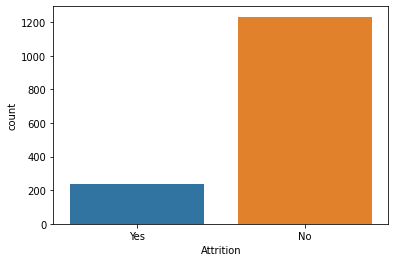

In [29]:
# y 各類別資料筆數統計
import seaborn as sns
sns.countplot(x=df['Attrition'])

In [30]:
# 以Pandas函數統計各類別資料筆數
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

## 檢查與時間有關的特徵相關性

<Figure size 576x360 with 0 Axes>

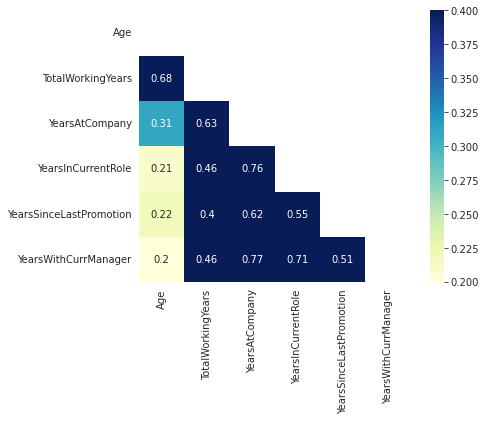

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# 設定關聯度上限為 0.4
max_corr = 0.4
time_params=['Age','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole',
             'YearsSinceLastPromotion','YearsWithCurrManager']
# 計算關聯度
corr_df=df[time_params].corr().round(2)

# 繪製熱力圖
plt.figure(figsize=(8,5))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr_df, mask=mask,vmax=max_corr, square=True, 
                     annot=True, cmap="YlGnBu");

In [32]:
# 刪除欄位
df.drop({'TotalWorkingYears','YearsInCurrentRole','YearsSinceLastPromotion',
         'YearsWithCurrManager'}, axis=1, inplace=True)

## 檢查與薪資(Salary)有關的特徵相關性

<Figure size 576x360 with 0 Axes>

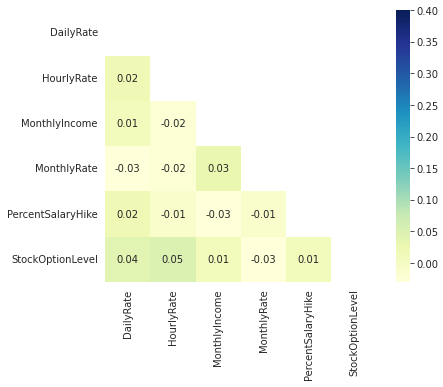

In [33]:
salary_params=['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate',
               'PercentSalaryHike','StockOptionLevel']
# 計算關聯度
corr_df=df[salary_params].corr().round(2)

# 繪製熱力圖
plt.figure(figsize=(8,5))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr_df, mask=mask,vmax=max_corr, square=True, 
                     annot=True, cmap="YlGnBu");

## 找出所有類別變數，並顯示其類別

In [36]:
df.select_dtypes('object').head()
print('Levels of categories: ')
for key in df.select_dtypes('object').keys():
    print(key ,':' ,df[key].unique())

Levels of categories: 
Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
Over18 : ['Y']
OverTime : ['Yes' 'No']


## 進行One-hot encoding

In [41]:
df2 = pd.get_dummies(df,columns=df.select_dtypes('object').keys(), 
                   prefix=df.select_dtypes('object').keys())
df2.keys()

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'Attrition_No', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'J

## 刪除One-hot encoding的第一個類別欄位(base category)

In [42]:
df2.drop({'Attrition_No','BusinessTravel_Non-Travel','Department_Human Resources',
         'EducationField_Human Resources','Gender_Female', 'MaritalStatus_Single',
          'OverTime_No'}, axis=1,inplace=True)
cont_vars=df2.select_dtypes('int').keys()
dummies= df2.select_dtypes('uint8').keys().drop('Attrition_Yes') # 刪除目標變數(Y) 
dummies

Index(['BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'Over18_Y', 'OverTime_Yes'],
      dtype='object')

## 指定特徵(X)及目標變數(Y)

In [59]:
X = df2.drop('Attrition_Yes', axis=1)
y = df2['Attrition_Yes']

## 3. 不須進行特徵工程

## 4. 資料分割

In [60]:
# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 45), (294, 45), (1176,), (294,))

## 特徵縮放

In [61]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. 選擇演算法、6. 模型訓練

In [76]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_std, y_train)

LogisticRegression()

## 7. 模型評分

In [64]:
# 計算準確率
y_pred = clf.predict(X_test_std)
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

90.14%


In [65]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[246   4]
 [ 25  19]]


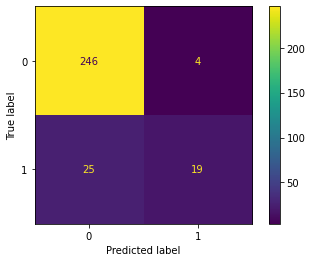

In [66]:
# 混淆矩陣圖
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

## statsmodels 作法

In [73]:
import statsmodels.api as sm

model=sm.Logit(y_train, X_train)
result=model.fit()
print(result.summary())

         Current function value: inf
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          Attrition_Yes   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1134
Method:                           MLE   Df Model:                           41
Date:                Mon, 02 Jan 2023   Pseudo R-squ.:                     inf
Time:                        17:50:04   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0480      0.014     -3.387      0.001      -0.076      -0.020
D

C:\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


## 顯示權重資訊

In [74]:
stat_df=pd.DataFrame({'coefficients':result.params, 'p-value': result.pvalues,
                      'odds_ratio': np.exp(result.params)})
stat_df

,coefficients,p-value,odds_ratio
Age,-0.048007,7.054524e-04,9.531270e-01
DailyRate,-0.000339,1.639429e-01,9.996612e-01
DistanceFromHome,0.036055,2.401740e-03,1.036713e+00
Education,0.091243,3.422700e-01,1.095535e+00
EmployeeCount,-0.018550,1.000000e+00,9.816208e-01
EmployeeNumber,-0.000018,9.125469e-01,9.999819e-01
EnvironmentSatisfaction,-0.453897,3.065622e-07,6.351479e-01
HourlyRate,-0.002071,6.691536e-01,9.979316e-01
JobInvolvement,-0.628173,5.235039e-06,5.335658e-01
JobLevel,0.102543,7.518654e-01,1.107985e+00


## 篩選重要的特徵變數

In [75]:
significant_params=stat_df[stat_df['p-value']<=0.05].index
significant_params

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'NumCompaniesWorked', 'RelationshipSatisfaction',
       'StockOptionLevel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'OverTime_Yes'],
      dtype='object')

## 勝負比(Odds)

In [77]:
stat_df.loc[significant_params].sort_values('odds_ratio', ascending=False)['odds_ratio']

BusinessTravel_Travel_Frequently    6.829312
OverTime_Yes                        6.647937
BusinessTravel_Travel_Rarely        2.920240
NumCompaniesWorked                  1.185867
DistanceFromHome                    1.036713
Age                                 0.953127
RelationshipSatisfaction            0.794538
JobSatisfaction                     0.720056
EnvironmentSatisfaction             0.635148
StockOptionLevel                    0.619935
JobInvolvement                      0.533566
Name: odds_ratio, dtype: float64

## 最後底定的模型：只保留重要的特徵變數

In [78]:
y=df2['Attrition_Yes']
X=df2[significant_params]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model=sm.Logit(y_train,X_train)
result=model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Attrition_Yes   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1165
Method:                           MLE   Df Model:                           10
Date:                Mon, 02 Jan 2023   Pseudo R-squ.:                     inf
Time:                        18:20:43   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age                                 -0.0454      0.009     -4.790    

C:\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


## 8. 模型評估，暫不進行

## 9. 模型佈署

## 10.模型預測，請參見 01_05_iris_prediction.py